# pQTL

**Created**: 23 February 2022

## Environment

In [1]:
if (!requireNamespace("patchwork")) {
    install.packages("devtools")
    devtools::install_github("thomasp85/patchwork")
}

Loading required namespace: patchwork



In [2]:
library(tidyverse)
library(patchwork)

setwd("~/eQTL_pQTL_Characterization/")

source("02_pQTL_Mapping/scripts/utils/ggplot_theme.R")

── Attaching packages ────────────────────────────────────────────────────────────────────────────────────────────────────────── tidyverse 1.3.1 ──

✔ ggplot2 3.3.5     ✔ purrr   0.3.4
✔ tibble  3.1.6     ✔ dplyr   1.0.7
✔ tidyr   1.1.4     ✔ stringr 1.4.0
✔ readr   2.1.1     ✔ forcats 0.5.1

── Conflicts ───────────────────────────────────────────────────────────────────────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()



## Load Data

In [3]:
cis.pqtl <- readRDS("~/gains_team282/proteomics/pqtl/pqtl_ms2019/cis_pqtl_all.RDS")

In [4]:
head(cis.pqtl)

,SNP,Chr,Position,pQTL_beta,pQTL_SE,pQTL_t,pQTL_pval,pQTL_Protein,Gene
,<chr>,<int>,<int>,<dbl>,<dbl>,<dbl>,<dbl>,<chr>,<chr>
1,rs79059311,8,21133434,-0.03131867,0.05348602,-0.5855487,0.5584249,O43593,ENSG00000168453
2,rs34883006,8,21133873,-0.04367747,0.05410443,-0.8072810,0.4197572,O43593,ENSG00000168453
3,rs35853955,8,21135276,-0.04367747,0.05410443,-0.8072810,0.4197572,O43593,ENSG00000168453
4,rs78546479,8,21135388,-0.04367747,0.05410443,-0.8072810,0.4197572,O43593,ENSG00000168453
5,rs13261360,8,21137022,-0.04384358,0.05411982,-0.8101205,0.4181245,O43593,ENSG00000168453
6,rs1563919,8,21139106,0.01378641,0.02750455,0.5012410,0.6162944,O43593,ENSG00000168453


In [5]:
sig.pgenes <- unique(cis.pqtl$pQTL_Protein[cis.pqtl$pQTL_pval < (5e-8) / 269])
sig.cis.pqtl <- cis.pqtl %>%
    dplyr::filter(pQTL_Protein %in% sig.pgenes)

In [6]:
head(sig.cis.pqtl)

,SNP,Chr,Position,pQTL_beta,pQTL_SE,pQTL_t,pQTL_pval,pQTL_Protein,Gene
,<chr>,<int>,<int>,<dbl>,<dbl>,<dbl>,<dbl>,<chr>,<chr>
1,rs34230989,7,94325169,-0.05024039,0.01729204,-2.905405,0.003752285,P27169,ENSG00000005421
2,rs2374714,7,94328846,-0.04706815,0.02848154,-1.652585,0.098619986,P27169,ENSG00000005421
3,rs35551616,7,94330441,-0.05097601,0.01734637,-2.938714,0.003373465,P27169,ENSG00000005421
4,rs17166182,7,94330606,-0.05017491,0.01733763,-2.893989,0.003890965,P27169,ENSG00000005421
5,rs2157811,7,94333984,-0.04556551,0.02833081,-1.608337,0.107975664,P27169,ENSG00000005421
6,rs1557657,7,94334008,-0.04566851,0.02841492,-1.607202,0.108220485,P27169,ENSG00000005421


In [7]:
trans.pqtl <- readRDS("~/gains_team282/proteomics/pqtl/pqtl_ms2019/trans_pqtl_all.RDS")

In [8]:
head(trans.pqtl)

,SNP,Chr,Position,pQTL_beta,pQTL_SE,pQTL_t,pQTL_pval,pQTL_Protein,pQTL_Locus
,<chr>,<int>,<int>,<dbl>,<dbl>,<dbl>,<dbl>,<chr>,<chr>
1,rs1859088,16,71172933,-0.008919439,0.01159847,-0.7690189,0.44192228,P19827,pQTL_1
2,rs9939485,16,71173976,0.003324982,0.01167227,0.2848616,0.77575395,P19827,pQTL_1
3,rs73579049,16,71174790,0.058046542,0.02613427,2.2210892,0.02656642,P19827,pQTL_1
4,rs28571623,16,71177078,0.005178698,0.01255262,0.4125593,0.67995917,P19827,pQTL_1
5,rs28663037,16,71177079,0.004538120,0.01260812,0.3599362,0.71891493,P19827,pQTL_1
6,rs9936084,16,71178368,0.006118056,0.01245574,0.4911836,0.62333870,P19827,pQTL_1


In [9]:
metadata <- read.table("~/gains_team282/nikhil/colocalization/eQTL_pQTL_metadata.tsv", sep="\t", header=TRUE)

In [10]:
head(metadata)

,Protein,Accession,Entry.Name,Gene.Names,Protein.Length,Coverage,Protein.Existence,Description,UniProt_ID,Gene_ID,⋯,feature,start,end,score,strand,frame,gene_id,gene_name,gene_biotype,tss
,<chr>,<chr>,<chr>,<chr>,<int>,<dbl>,<chr>,<chr>,<chr>,<chr>,⋯,<chr>,<dbl>,<dbl>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<dbl>
1,sp|A0A075B6I9|LV746_HUMAN,A0A075B6I9,LV746_HUMAN,IGLV7-46,117,76.9,3:Protein inferred from homology,Immunoglobulin lambda variable 7-46,A0A075B6I9,ENSG00000211649,⋯,gene,22369614,22370087,.,+,.,ENSG00000211649,IGLV7-46,IG_V_gene,22369614
2,sp|A0A075B6P5|KV228_HUMAN,A0A075B6P5,KV228_HUMAN,IGKV2-28,120,100.0,3:Protein inferred from homology,Immunoglobulin kappa variable 2-28,A0A075B6P5,ENSG00000244116,⋯,gene,89221698,89222461,.,-,.,ENSG00000244116,IGKV2-28,IG_V_gene,89222461
3,sp|A0A075B6P5|KV228_HUMAN,A0A075B6P5,KV228_HUMAN,IGKV2-28,120,100.0,3:Protein inferred from homology,Immunoglobulin kappa variable 2-28,A0A075B6P5,ENSG00000282025,⋯,,NA,NA,,,,,,,NA
4,sp|A0A087WSY6|KVD15_HUMAN,A0A087WSY6,KVD15_HUMAN,IGKV3D-15,115,96.5,3:Protein inferred from homology,Immunoglobulin kappa variable 3D-15,A0A087WSY6,ENSG00000224041,⋯,gene,90114838,90115402,.,+,.,ENSG00000224041,IGKV3D-15,IG_V_gene,90114838
5,sp|A0A087WW87|KV240_HUMAN,A0A087WW87,KV240_HUMAN,IGKV2-40,121,81.0,3:Protein inferred from homology,Immunoglobulin kappa variable 2-40,A0A087WW87,ENSG00000273962,⋯,gene,89330110,89330429,.,-,.,ENSG00000273962,IGKV2-40,IG_V_gene,89330429
6,sp|A0A0B4J1V0|HV315_HUMAN,A0A0B4J1V0,HV315_HUMAN,IGHV3-15,119,84.0,3:Protein inferred from homology,Immunoglobulin heavy variable 3-15,A0A0B4J1V0,ENSG00000282290,⋯,,NA,NA,,,,,,,NA


## Visualize Significant cis-pQTL

Overall, we tested 269 proteins for the presence of pQTL. I use a Bonferroni FWER of $p < \frac{5\times 10^{-8}}{269}$. There are 23 *cis*-pQTL detected in the cohort.

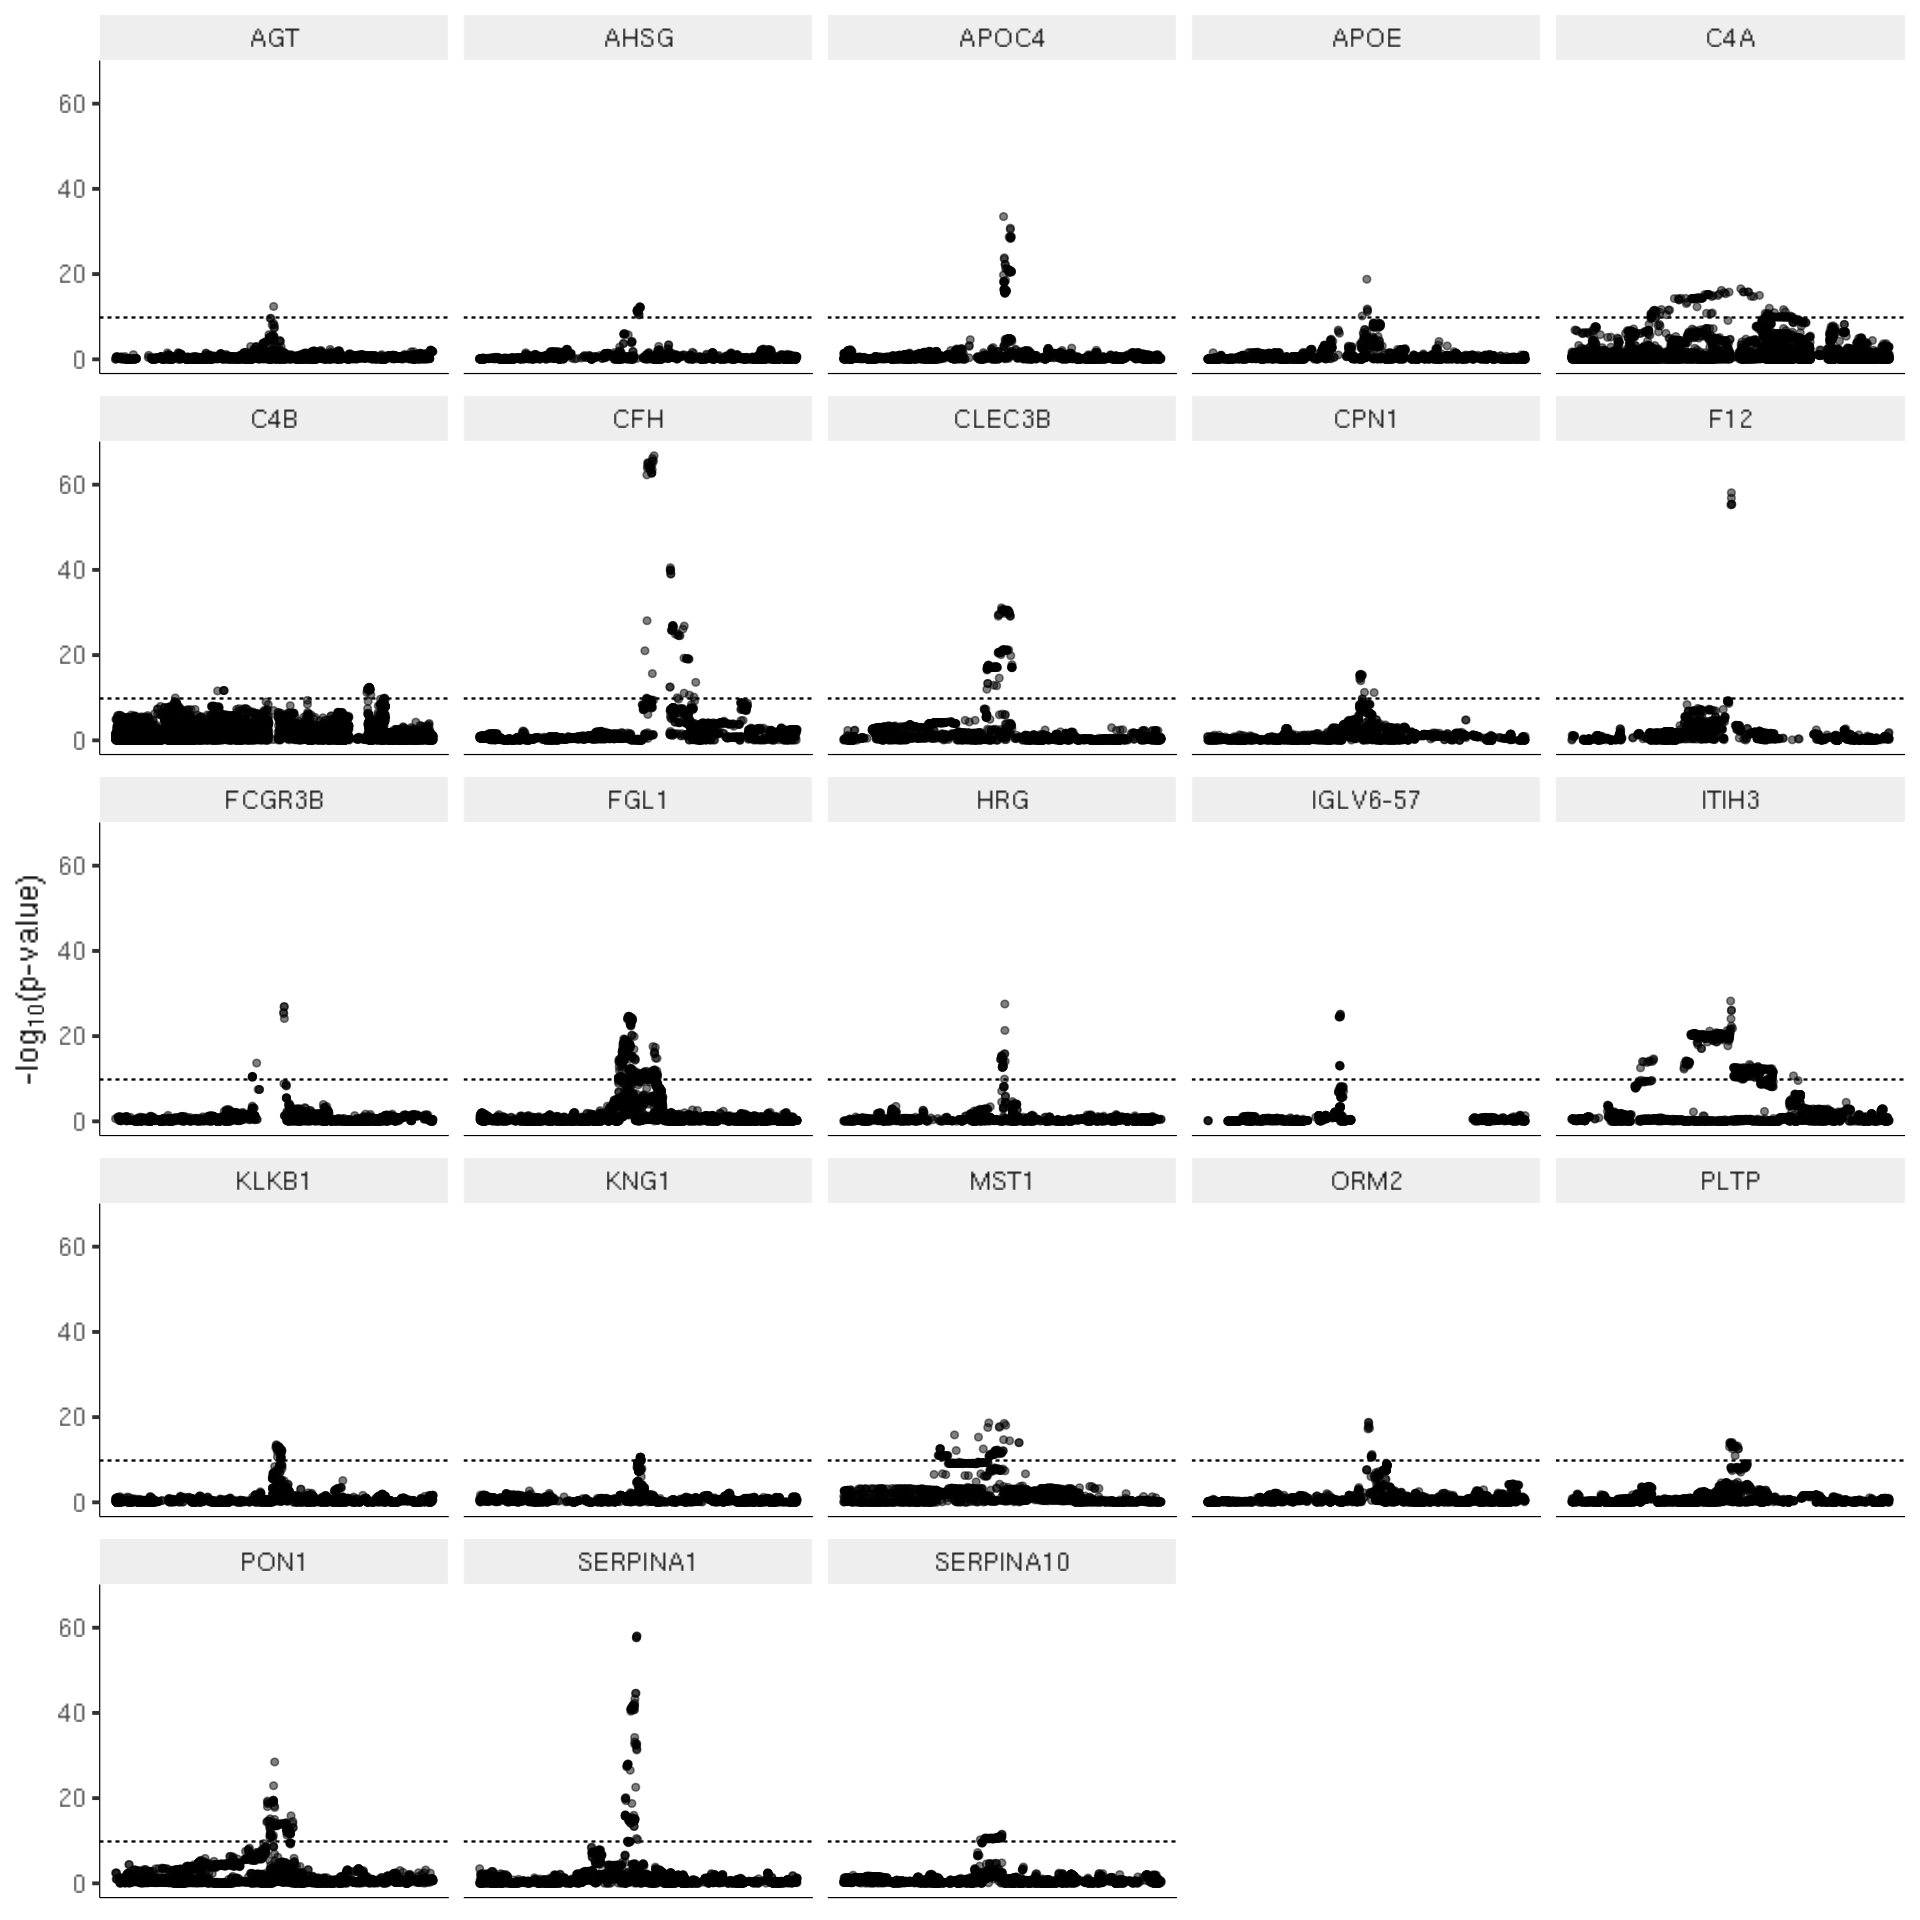

In [11]:
options(repr.plot.width=16, repr.plot.height=16)

sig.cis.pqtl %>%
    merge(., metadata, by.x="Gene", by.y="Gene_ID") %>%
    ggplot() +
    geom_point(aes(x=Position, y=-log10(pQTL_pval)), alpha=0.5) +
    geom_hline(aes(yintercept=-log10(5e-8 / 269)), lty=2) +
    facet_wrap(.~Gene.Names, scales="free_x") +
    ylab(bquote("-log"[10]*"(p-value)")) +
    ggplot_theme +
    theme(axis.title.x=element_blank(), axis.text.x=element_blank(), axis.ticks.x=element_blank())

ggsave("02_pQTL_Mapping/results/cis.pqtl.assoc.plots.png", width=16, height=16, dpi=600)

## Visualize Significant trans-pQTL

Overall, we tested 269 proteins for the presence of pQTL. I use a Bonferroni FWER of $p < \frac{5\times 10^{-8}}{269}$. There are 6 *trans*-pQTL detected in the cohort.

In [12]:
metadata.gene.names <- metadata %>%
    dplyr::select(Accession, Gene.Names) %>%
    unique()

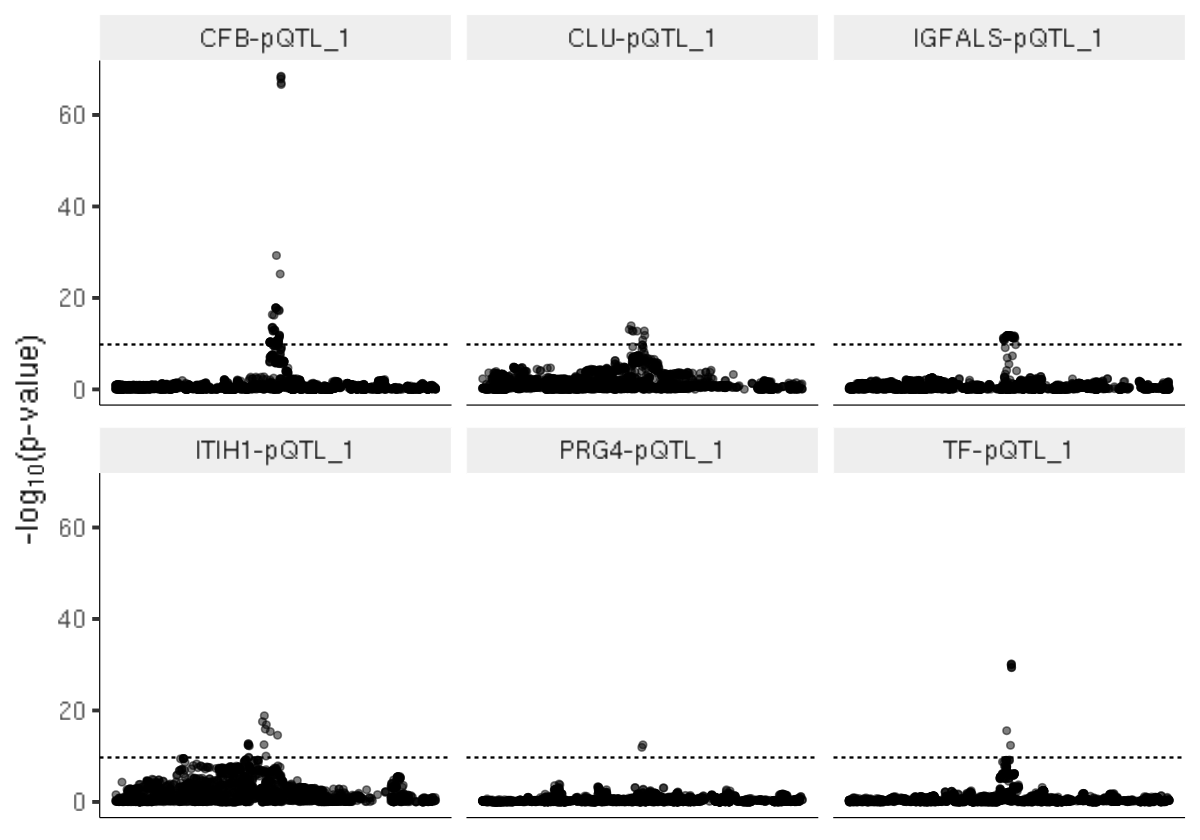

In [13]:
options(repr.plot.width=10, repr.plot.height=7)

trans.pqtl %>%
    merge(., metadata.gene.names, by.x="pQTL_Protein", by.y="Accession") %>%
    dplyr::mutate(pQTL_ID=paste0(Gene.Names, "-", pQTL_Locus)) %>%
    ggplot() +
    geom_point(aes(x=Position, y=-log10(pQTL_pval)), alpha=0.5) +
    geom_hline(aes(yintercept=-log10(5e-8 / 269)), lty=2) +
    facet_wrap(.~pQTL_ID, scales="free_x") +
    ylab(bquote("-log"[10]*"(p-value)")) +
    ggplot_theme +
    theme(axis.title.x=element_blank(), axis.text.x=element_blank(), axis.ticks.x=element_blank())

ggsave("02_pQTL_Mapping/results/trans.pqtl.assoc.plots.png", width=10, height=7, dpi=600)

Some of these *trans*-pQTL are in the same region. Is it worth colocalising these loci? I check by plotting the association plots together.

In [15]:
trans.pqtl %>%
    merge(., metadata.gene.names, by.x="pQTL_Protein", by.y="Accession") %>%
    dplyr::mutate(pQTL_ID=paste0(Gene.Names, "-", pQTL_Locus)) %>%
    dplyr::group_by(pQTL_ID, Chr) %>%
    dplyr::summarize(Mean.Position=mean(Position), .groups="drop")

pQTL_ID,Chr,Mean.Position
<chr>,<int>,<dbl>
CFB-pQTL_1,14,94297063
CLU-pQTL_1,16,72015174
IGFALS-pQTL_1,8,95282750
ITIH1-pQTL_1,16,72015174
PRG4-pQTL_1,14,94348541
TF-pQTL_1,14,94337271


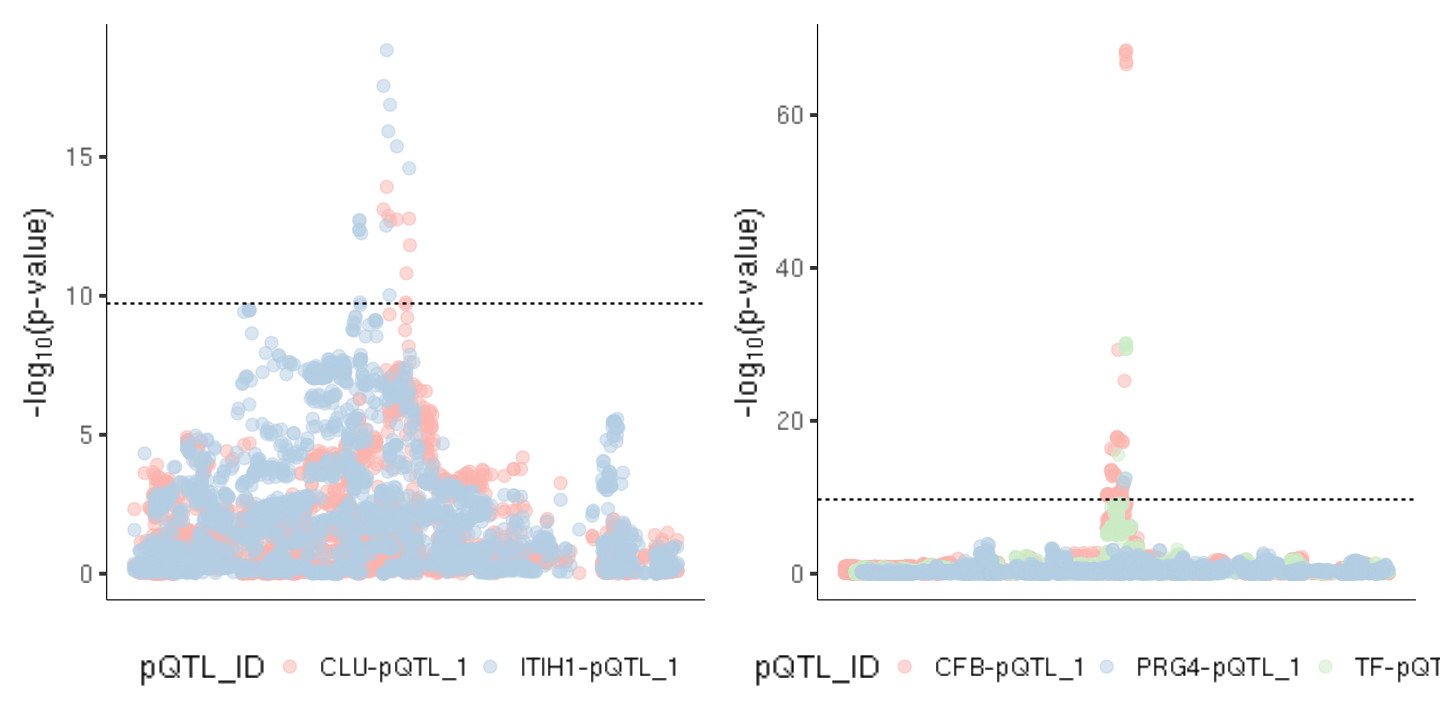

In [16]:
options(repr.plot.width=12, repr.plot.height=6)

p1 <- trans.pqtl %>%
    merge(., metadata.gene.names, by.x="pQTL_Protein", by.y="Accession") %>%
    dplyr::mutate(pQTL_ID=paste0(Gene.Names, "-", pQTL_Locus)) %>%
    dplyr::filter(pQTL_ID %in% c("CLU-pQTL_1", "ITIH1-pQTL_1")) %>%
    ggplot() +
    geom_point(aes(x=Position, y=-log10(pQTL_pval), color=pQTL_ID), alpha=0.5, size=I(3)) +
    geom_hline(aes(yintercept=-log10(5e-8 / 269)), lty=2) +
    scale_color_brewer(palette="Pastel1") +
    ylab(bquote("-log"[10]*"(p-value)")) +
    ggplot_theme +
    theme(axis.title.x=element_blank(), axis.text.x=element_blank(), axis.ticks.x=element_blank())

p2 <- trans.pqtl %>%
    merge(., metadata.gene.names, by.x="pQTL_Protein", by.y="Accession") %>%
    dplyr::mutate(pQTL_ID=paste0(Gene.Names, "-", pQTL_Locus)) %>%
    dplyr::filter(pQTL_ID %in% c("CFB-pQTL_1", "PRG4-pQTL_1", "TF-pQTL_1")) %>%
    ggplot() +
    geom_point(aes(x=Position, y=-log10(pQTL_pval), color=pQTL_ID), alpha=0.5, size=I(3)) +
    geom_hline(aes(yintercept=-log10(5e-8 / 269)), lty=2) +
    scale_color_brewer(palette="Pastel1") +
    ylab(bquote("-log"[10]*"(p-value)")) +
    ggplot_theme +
    theme(axis.title.x=element_blank(), axis.text.x=element_blank(), axis.ticks.x=element_blank())

p1 + p2

ggsave("02_pQTL_Mapping/results/trans.pqtl.overlap.assoc.plots.png", width=12, height=6)